In [1]:
import os
import pandas as pd
import numpy as np
import math
import copy
from scipy import stats
from scipy.stats import norm
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from scipy.stats import skew
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()


In [2]:
dados_train = pd.read_csv('C:/Users/Manoel/Documents/GitHub/Venda_Casas/input/train.csv')
dados_test = pd.read_csv('C:/Users/Manoel/Documents/GitHub/Venda_Casas/input/test.csv')

In [3]:
dados_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
dados_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
dados_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# porcentagem total de missing values - válido apenas para as quantitativas:
total = dados_train.isnull().sum().sort_values(ascending=False)
percentual = (dados_train.isnull().sum()/dados_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
missing_data

,Total,Percentual
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000
TotalBsmtSF,0,0.000000


In [7]:
missing_data[:10]

,Total,Percentual
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


O primeiro passo foi excluir as colunas que possuiam mais de 40% das linhas vazias.

In [8]:
colunas_a_manter = missing_data.index[missing_data['Percentual'] < 40].tolist()

In [9]:
# Dropando aquelas colunas que possuem mais de 40% de missing values:
dados_train = dados_train[colunas_a_manter]

In [10]:
dados_train

,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,...,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,TotalBsmtSF,Id
0,65.0,TA,Attchd,2003.0,RFn,TA,No,Unf,GLQ,TA,...,1,1710,0,854,856,Y,Normal,GasA,856,1
1,80.0,TA,Attchd,1976.0,RFn,TA,Gd,Unf,ALQ,TA,...,0,1262,0,0,1262,Y,Normal,GasA,1262,2
2,68.0,TA,Attchd,2001.0,RFn,TA,Mn,Unf,GLQ,TA,...,1,1786,0,866,920,Y,Normal,GasA,920,3
3,60.0,TA,Detchd,1998.0,Unf,TA,No,Unf,ALQ,Gd,...,1,1717,0,756,961,Y,Abnorml,GasA,756,4
4,84.0,TA,Attchd,2000.0,RFn,TA,Av,Unf,GLQ,TA,...,1,2198,0,1053,1145,Y,Normal,GasA,1145,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,TA,Attchd,1999.0,RFn,TA,No,Unf,Unf,TA,...,0,1647,0,694,953,Y,Normal,GasA,953,1456
1456,85.0,TA,Attchd,1978.0,Unf,TA,No,Rec,ALQ,TA,...,1,2073,0,0,2073,Y,Normal,GasA,1542,1457
1457,66.0,TA,Attchd,1941.0,RFn,TA,No,Unf,GLQ,Gd,...,0,2340,0,1152,1188,Y,Normal,GasA,1152,1458
1458,68.0,TA,Attchd,1950.0,Unf,TA,Mn,Rec,GLQ,TA,...,1,1078,0,0,1078,Y,Normal,GasA,1078,1459


Verificando a distribuição dos preços:

C:\Users\Manoel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180921.20 and sigma = 79415.29



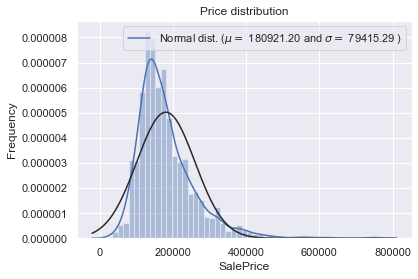

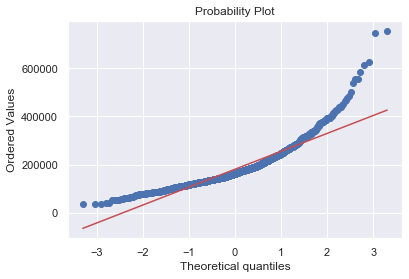

In [11]:
sns.distplot(dados_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dados_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(dados_train['SalePrice'], plot=plt)
plt.show()

Histograma:

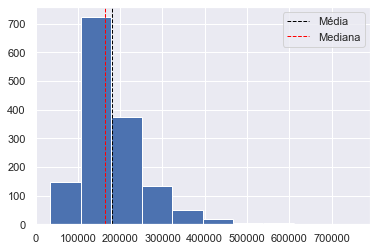

In [12]:
### Lets plot histogram for prices less than 2000
hist_price1 = dados_train['SalePrice'].hist()
media = dados_train['SalePrice'].mean()
mediana = dados_train['SalePrice'].median()
plt.axvline(media, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mediana, color='red', linestyle='dashed', linewidth=1)
plt.legend({'Média':media,'Mediana':mediana})
plt.show()

Box-plot:

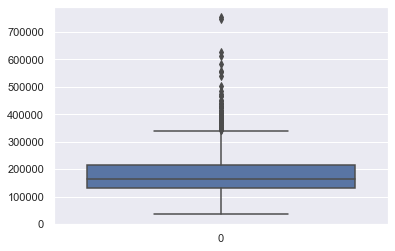

In [13]:
sns.boxplot(data=dados_train['SalePrice'])
plt.show()

In [14]:
dados_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

A distribuição dos preços não é normal, pois é assimétrica a direita devido a presença de outliers positivos. A média do preço das casas vendidas foi de 180921 e o desvio-padrão de 79442. A mediana foi 163000 e 75% do preço das casas é inferior a 214000. O maior valor registrado de casas foi 755000 enquanto o menor foi 34900.

# Separando as variáveis em categóricas e numéricas:

In [15]:
# verificando as variáveis categóricas
categorical_features = list(dados_train.select_dtypes(include=['object']).columns)
print("variáveis categóricas : " + str(len(categorical_features)))
categorical_features

variáveis categóricas : 38


['GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'Electrical',
 'Utilities',
 'Foundation',
 'ExterCond',
 'ExterQual',
 'Exterior2nd',
 'Exterior1st',
 'RoofMatl',
 'RoofStyle',
 'LotConfig',
 'HouseStyle',
 'BldgType',
 'Condition2',
 'MSZoning',
 'Street',
 'Condition1',
 'Neighborhood',
 'LotShape',
 'LandContour',
 'LandSlope',
 'HeatingQC',
 'PavedDrive',
 'SaleType',
 'Functional',
 'KitchenQual',
 'CentralAir',
 'SaleCondition',
 'Heating']

In [16]:
# variáveis numéricas
numerical_features = list(dados_train.select_dtypes(exclude = ["object"]).columns)
print("variáveis numéricas : " + str(len(numerical_features)))
numerical_features

variáveis numéricas : 38


['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'YearRemodAdd',
 'MSSubClass',
 'YearBuilt',
 'OverallCond',
 'OverallQual',
 'BsmtFinSF1',
 'LotArea',
 'SalePrice',
 'BsmtFinSF2',
 'EnclosedPorch',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch',
 'BsmtUnfSF',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotRmsAbvGrd',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'HalfBath',
 'FullBath',
 'BsmtHalfBath',
 'BsmtFullBath',
 'GrLivArea',
 'LowQualFinSF',
 '2ndFlrSF',
 '1stFlrSF',
 'TotalBsmtSF',
 'Id']

In [17]:
test_list = copy.deepcopy(numerical_features)
test_list.remove('SalePrice')

In [18]:
test_list

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'YearRemodAdd',
 'MSSubClass',
 'YearBuilt',
 'OverallCond',
 'OverallQual',
 'BsmtFinSF1',
 'LotArea',
 'BsmtFinSF2',
 'EnclosedPorch',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch',
 'BsmtUnfSF',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotRmsAbvGrd',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'HalfBath',
 'FullBath',
 'BsmtHalfBath',
 'BsmtFullBath',
 'GrLivArea',
 'LowQualFinSF',
 '2ndFlrSF',
 '1stFlrSF',
 'TotalBsmtSF',
 'Id']

# Analisando as Numéricas:

In [19]:
limpando_num_train = dados_train[numerical_features]
limpando_num_test = dados_test[test_list]

In [20]:
limpando_num_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
LotFrontage      1201 non-null float64
GarageYrBlt      1379 non-null float64
MasVnrArea       1452 non-null float64
YearRemodAdd     1460 non-null int64
MSSubClass       1460 non-null int64
YearBuilt        1460 non-null int64
OverallCond      1460 non-null int64
OverallQual      1460 non-null int64
BsmtFinSF1       1460 non-null int64
LotArea          1460 non-null int64
SalePrice        1460 non-null int64
BsmtFinSF2       1460 non-null int64
EnclosedPorch    1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
3SsnPorch        1460 non-null int64
BsmtUnfSF        1460 non-null int64
ScreenPorch      1460 non-null int64
PoolArea         1460 non-null int64
MiscVal          1460 non-null int64
MoSold           1460 non-null int64

In [21]:
def boxplot_scatterplot(dataset, variavel_alvo, variavel_explicativa):
    
    print(f'A seguir estatística descritiva da nossa variável {variavel_explicativa}:')
    print(f'\n{dataset[variavel_explicativa].describe()}')
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    g1 = sns.boxplot(data=dataset[variavel_explicativa], ax=ax[0])
    g1.set_title(variavel_explicativa, fontsize = 14.5, y =1.02)
    g1.set(xticklabels=[]) 

    g2 = sns.scatterplot(x=variavel_explicativa, y=variavel_alvo, data=dataset, alpha=0.6, ax=ax[1])
    g2.set_title(variavel_alvo +' '+'x'+' '+variavel_explicativa, fontsize = 14.5, y =1.02)

    plt.show()
    
    return

A seguir estatística descritiva da nossa variável LotArea:

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


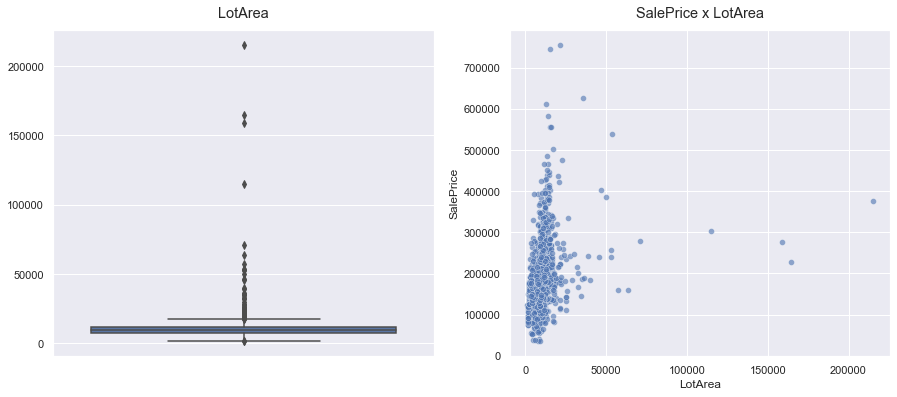

In [22]:
boxplot_scatterplot(limpando_num_train, 'SalePrice', 'LotArea')

Os gráficos acima mostram box-plot do LotArea e sua relação com a variável-alvo. Há diversos outliers no LotArea, mas quando observado esses outliers em comparação com o preço, não geraram um outlier em relação ao preço. Parece existir uma relação positiva entre LotArea e SalePrice.
Apesar dos outliers, os dados estão bem 'agrupados' quando olhamos os quartis. 25% dos valores estão abaixo de 7553.50, a mediana foi 9478.50 e 75% das observações estão abaixo de 11601.50.

In [23]:
limpando_num_train['LotArea'].quantile(0.99)

37567.64000000022

In [24]:
limpando_num_train['LotArea'] = np.where(limpando_num_train['LotArea'] > limpando_num_train['LotArea'].quantile(0.99), limpando_num_train['LotArea'].median(), limpando_num_train['LotArea'])
limpando_num_test['LotArea'] = np.where(limpando_num_test['LotArea'] > limpando_num_test['LotArea'].quantile(0.99), limpando_num_test['LotArea'].median(), limpando_num_test['LotArea'])

C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


A seguir estatística descritiva da nossa variável LotFrontage:

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


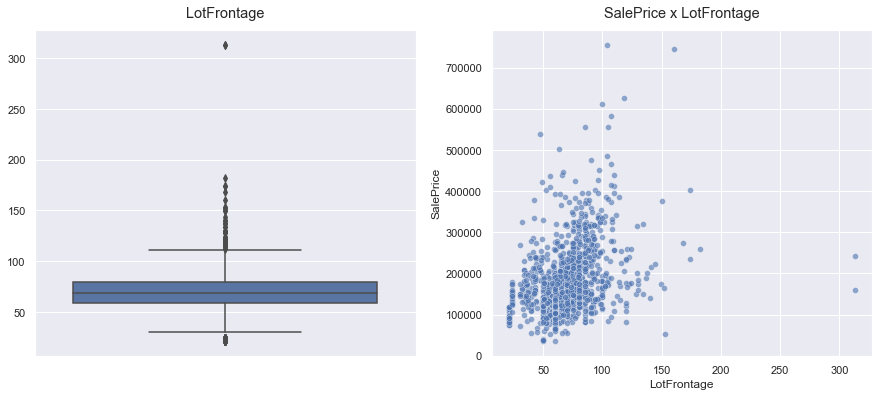

In [25]:
boxplot_scatterplot(limpando_num_train, 'SalePrice', 'LotFrontage')

LotFrontage apresenta alguns outliers também. O fato interessante é que esses outliers não parecem estar relacionados com SalePrice. O box-plot mostra que apesar dos outliers, os quantis estão bem distribuidos, onde o 25% das observações são inferiores a 59 e 75% das observações inferiores a 80.

In [26]:
limpando_num_train['LotFrontage'].quantile(0.99)

141.0

In [27]:
limpando_num_train['LotFrontage'] = np.where(limpando_num_train['LotFrontage'] > limpando_num_train['LotFrontage'].quantile(0.99), limpando_num_train['LotFrontage'].median(), limpando_num_train['LotFrontage'])
limpando_num_test['LotFrontage'] = np.where(limpando_num_test['LotFrontage'] > limpando_num_test['LotFrontage'].quantile(0.99), limpando_num_test['LotFrontage'].median(), limpando_num_test['LotFrontage'])

C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


A seguir estatística descritiva da nossa variável YearBuilt:

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


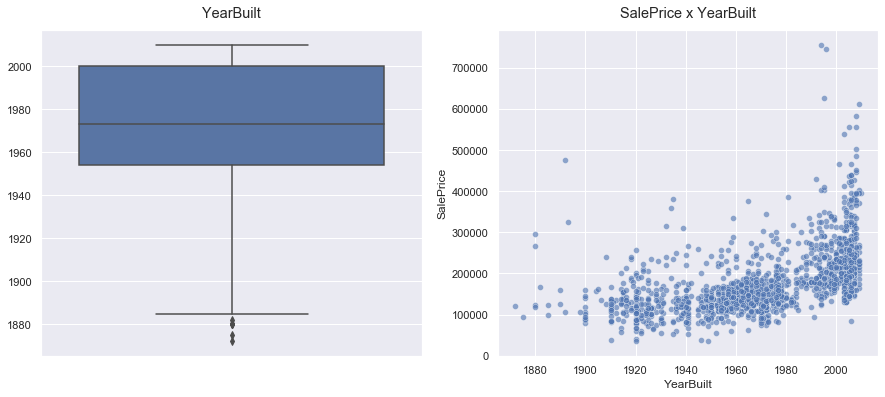

In [28]:
boxplot_scatterplot(limpando_num_train, 'SalePrice', 'YearBuilt')

Em relação ao ano de construção, temos apenas outliers negativos. O imóvel mais antigo é de 1872, ou seja, possui mais de 100 anos. Os imóveis mais novos, parecem afetar positivamente o preço. 75% dos imóveis foram construídos antes de 2000.

A seguir estatística descritiva da nossa variável GarageArea:

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


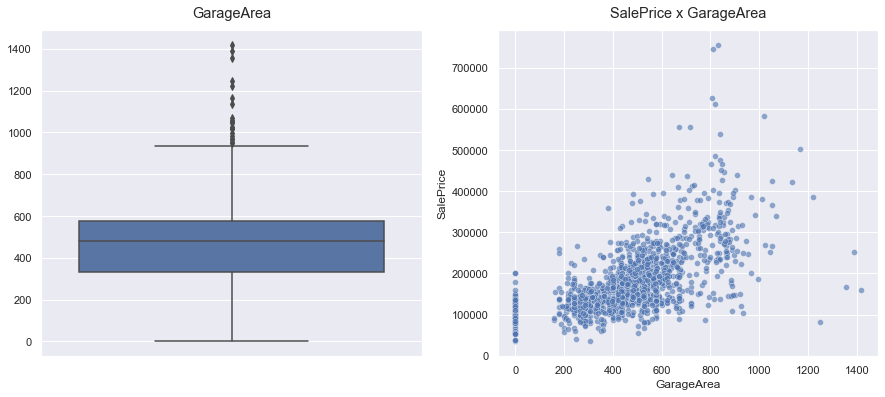

In [29]:
boxplot_scatterplot(limpando_num_train, 'SalePrice', 'GarageArea')

Área de garagem também possui ouliers positivos. O valor máximo foi 1418, a mediana de 480 e 75% dos dados são menores que 576. Existe uma relação positiva entre GarageArea e Price, contudo, isso não se observa nos maiores outliers. Há alguns imóveis que não possuem GarageArea e seus valores não foram superiores a 200000. Ausência de garagem parece limitar bem o preço das casas.

In [30]:
limpando_num_train['GarageArea'] = np.where(limpando_num_train['GarageArea'] > limpando_num_train['GarageArea'].quantile(0.99), limpando_num_train['GarageArea'].median(), limpando_num_train['GarageArea'])
limpando_num_test['GarageArea'] = np.where(limpando_num_test['GarageArea'] > limpando_num_test['GarageArea'].quantile(0.99), limpando_num_test['GarageArea'].median(), limpando_num_test['GarageArea'])

C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


A seguir estatística descritiva da nossa variável 1stFlrSF:

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


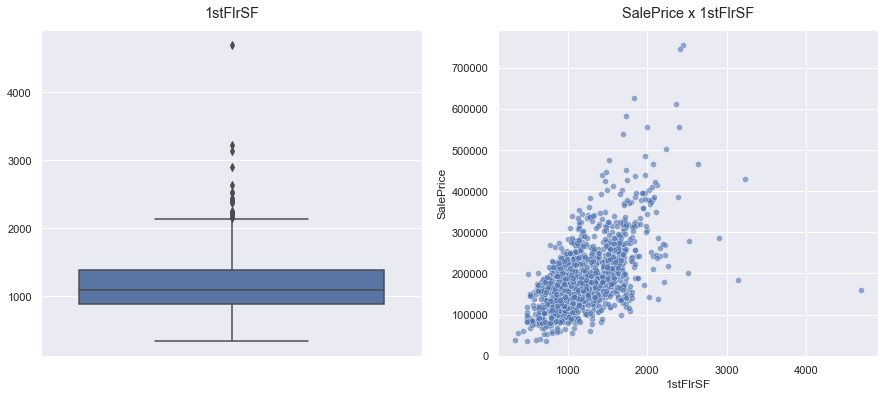

In [31]:
boxplot_scatterplot(limpando_num_train, 'SalePrice', '1stFlrSF')

O maior valor da variável 1stFlrSF, que representa a área do primeiro andar do imóvel, foi 4692.00. Podemos ver alguns outliers no gráfico da dispersão. Além disso, parece existir forte correlação positiva entre tamanho do primeiro andar e preço - geralmente, conforme essa área é maior, o preço também é.

A seguir estatística descritiva da nossa variável 2ndFlrSF:

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


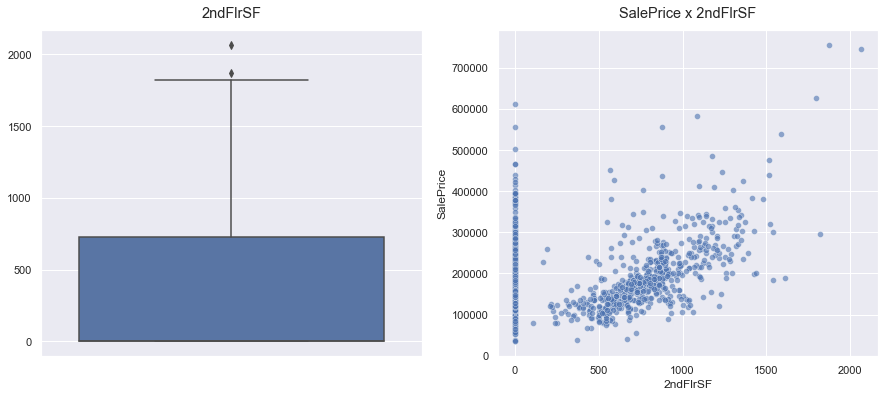

In [32]:
boxplot_scatterplot(limpando_num_train, 'SalePrice', '2ndFlrSF')

Em relação ao segunda andar, tenho um fato curioso. 50% dos imóveis a venda, não possuem segundo andar e possuimos somente 2 outliers. Além disso, apesar de parecer existir uma relação entre preço e segundo andar, muitos imóveis que não possuem segundo andar são mas caros que imóveis que possuem.

In [33]:
limpando_num_train['TotalAreaSF'] = limpando_num_train['1stFlrSF'] + limpando_num_train['2ndFlrSF']
limpando_num_test['TotalAreaSF'] = limpando_num_test['1stFlrSF'] + limpando_num_test['2ndFlrSF']

C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


A seguir estatística descritiva da nossa variável TotalAreaSF:

count    1460.000000
mean     1509.619178
std       521.163523
min       334.000000
25%      1123.750000
50%      1458.000000
75%      1775.250000
max      5642.000000
Name: TotalAreaSF, dtype: float64


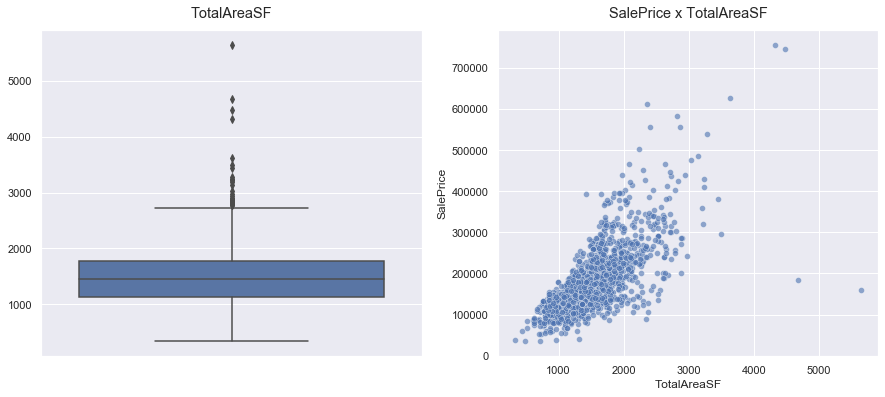

In [34]:
boxplot_scatterplot(limpando_num_train, 'SalePrice', 'TotalAreaSF')

TotalAreaSF, que é a soma de 1stFlrSF e 2ndFlrSF, podemos ver uma relação positiva entre TotalAreaSF e preço pelo gráfico de dispersão. O box-plot indica alguns outliers positivos. Verificando os quartis, a mediana indica que 50% dos imóveis possuem uma área inferior a 1458.00 e outros 50% possuem uma área maior que essa. A média da área dos imóveis foi 1509.61, o menor imóvel tem o tamanho de 334 e o maior 5642.

In [35]:
limpando_num_train['TotalAreaSF'] = np.where(limpando_num_train['TotalAreaSF'] > limpando_num_train['TotalAreaSF'].quantile(0.99), limpando_num_train['TotalAreaSF'].median(), limpando_num_train['TotalAreaSF'])
limpando_num_test['TotalAreaSF'] = np.where(limpando_num_test['TotalAreaSF'] > limpando_num_test['TotalAreaSF'].quantile(0.99), limpando_num_test['TotalAreaSF'].median(), limpando_num_test['TotalAreaSF'])

C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


A seguir estatística descritiva da nossa variável GarageCars:

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


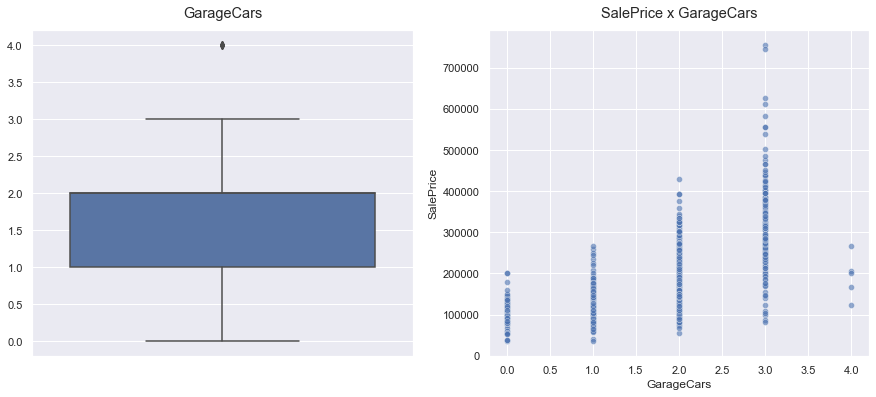

In [36]:
boxplot_scatterplot(limpando_num_train, 'SalePrice', 'GarageCars')

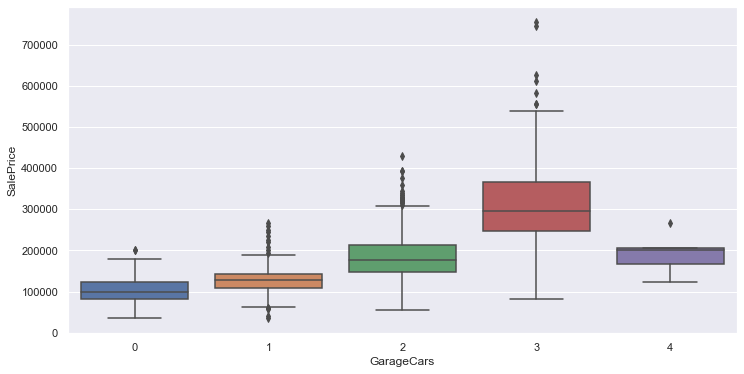

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="GarageCars", y="SalePrice", data=limpando_num_train)
plt.show()

Olhando o box-plot por faixa de quantidade e carros na garagem, percebemos que esse número afeta positivamente o preço de venda da casa, exceto de 4 carros, que apresentou uma queda em relação a variação da quantidade anterior(mas essa quantidade tem poucas observações, além de ser um próprio outlier na quantidade de carros). A quantidade de 3 carros foi a que apresentou maior faixa de preço das casas.

In [38]:
limpando_num_train['GarageCars'].quantile(0.999)

4.0

In [39]:
limpando_num_train['GarageCars'] = np.where(limpando_num_train['GarageCars'] > limpando_num_train['GarageCars'].quantile(0.999), limpando_num_train['GarageCars'].median(), limpando_num_train['GarageCars'])
limpando_num_test['GarageCars'] = np.where(limpando_num_test['GarageCars'] > limpando_num_test['GarageCars'].quantile(0.999), limpando_num_test['GarageCars'].median(), limpando_num_test['GarageCars'])

C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


A seguir estatística descritiva da nossa variável OverallCond:

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


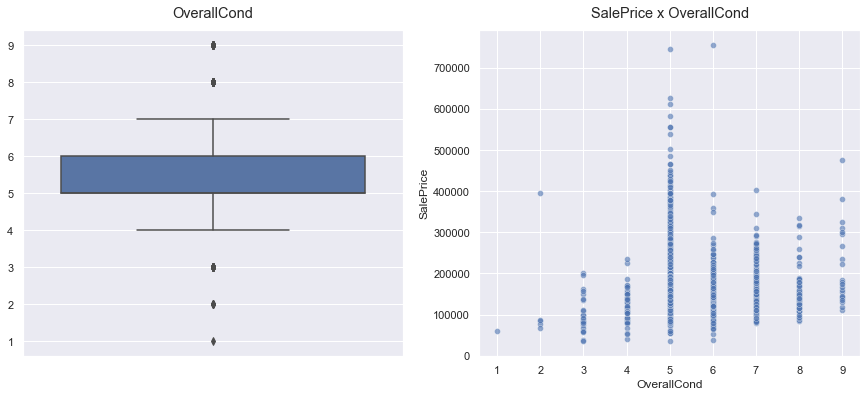

In [40]:
boxplot_scatterplot(limpando_num_train, 'SalePrice', 'OverallCond')

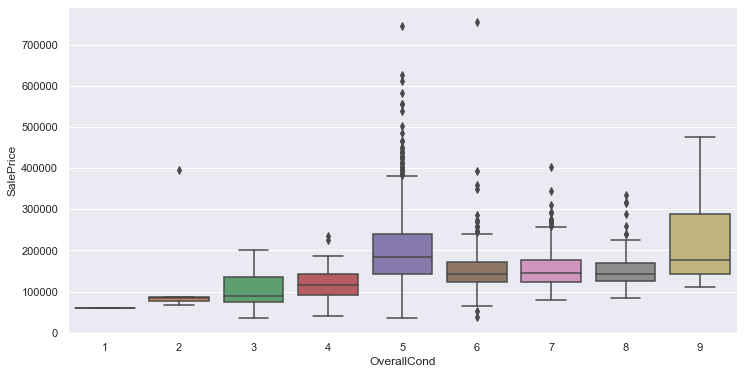

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="OverallCond", y="SalePrice", data=limpando_num_train)
plt.show()

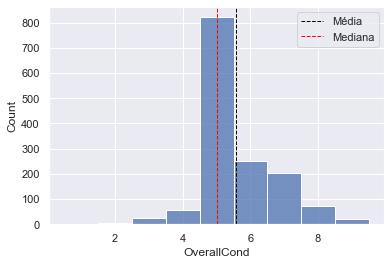

In [42]:
### Lets plot histogram for prices less than 2000
sns.histplot(data=limpando_num_train, x="OverallCond", discrete=True)
media = limpando_num_train['OverallCond'].mean()
mediana = limpando_num_train['OverallCond'].median()
plt.axvline(media, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mediana, color='red', linestyle='dashed', linewidth=1)
plt.legend({'Média':media,'Mediana':mediana})
plt.show()

O histograma da condição geral do imóvel indica que mais da metade dos imóveis foram avaliados com qualidade 5. E o interessante é que o box-plot por faixa de condição mostra que 5 possui preços maiores que imóveis listados com condição superior, 6, 7 e 8. 

A seguir estatística descritiva da nossa variável OverallQual:

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


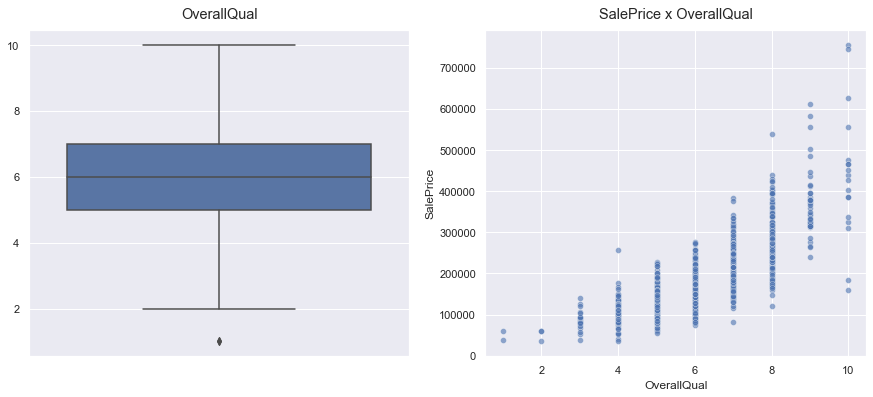

In [43]:
boxplot_scatterplot(limpando_num_train, 'SalePrice', 'OverallQual')

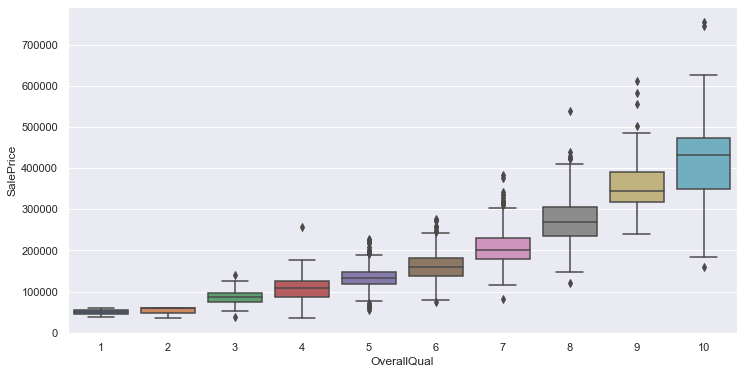

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="OverallQual", y="SalePrice", data=limpando_num_train)
plt.show()

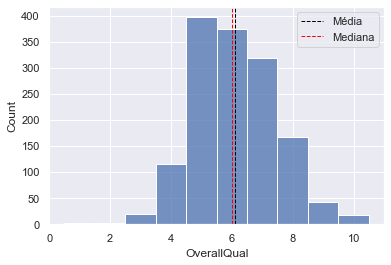

In [45]:
### Lets plot histogram for prices less than 2000
sns.histplot(data=limpando_num_train, x="OverallQual", discrete=True)
media = limpando_num_train['OverallQual'].mean()
mediana = limpando_num_train['OverallQual'].median()
plt.axvline(media, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mediana, color='red', linestyle='dashed', linewidth=1)
plt.legend({'Média':media,'Mediana':mediana})
plt.show()

A qualidade geral os imóveis ficou bem concentrada entre os valores 5, 6 e 7. A média da qualidade geral dos imóveis foi 6 e 75% dos imóveis ficaram com a qualidade geral inferior a 7. O box-plot por faixa de qualidade mostra que claramente há uma relação positiva entre qualidade e preço, indicando que imóveis classificados com uma qualidade melhor são mais caros.

A seguir estatística descritiva da nossa variável FullBath:

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


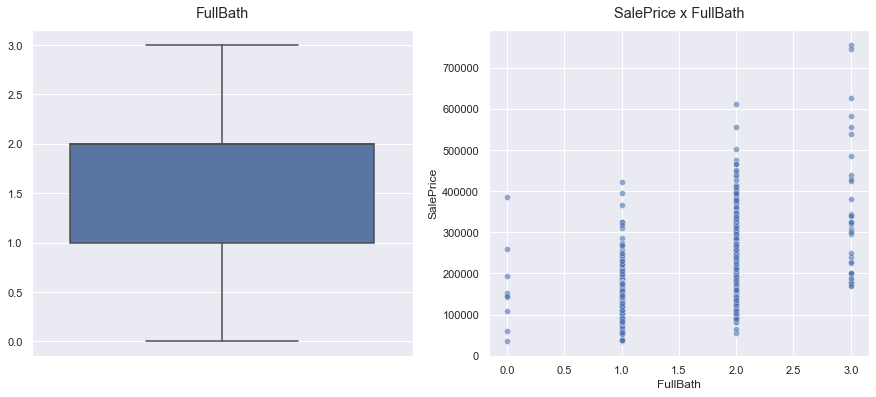

In [46]:
boxplot_scatterplot(limpando_num_train, 'SalePrice', 'FullBath')

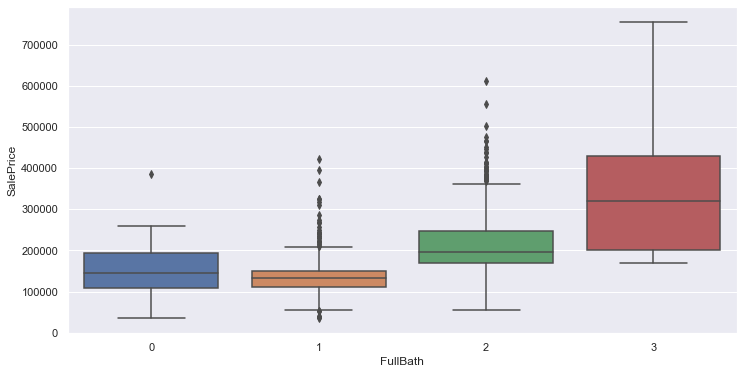

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="FullBath", y="SalePrice", data=limpando_num_train)
plt.show()

FullBath, exluindo aquele imóveis que tiveram 0 (muito provavelmente pela qauntidade bem reduzida de observações, podemos ver isso no gráfico de dispersão), também apresentou um relação positiva da quantidade em relação ao preço. 75% dos imíveis possuem até 2 FullBath. A maior quantidade registrada foi de 3.

In [48]:
limpando_num_train

,LotFrontage,GarageYrBlt,MasVnrArea,YearRemodAdd,MSSubClass,YearBuilt,OverallCond,OverallQual,BsmtFinSF1,LotArea,...,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,TotalBsmtSF,Id,TotalAreaSF
0,65.0,2003.0,196.0,2003,60,2003,5,7,706,8450.0,...,2,0,1,1710,0,854,856,856,1,1710.0
1,80.0,1976.0,0.0,1976,20,1976,8,6,978,9600.0,...,2,1,0,1262,0,0,1262,1262,2,1262.0
2,68.0,2001.0,162.0,2002,60,2001,5,7,486,11250.0,...,2,0,1,1786,0,866,920,920,3,1786.0
3,60.0,1998.0,0.0,1970,70,1915,5,7,216,9550.0,...,1,0,1,1717,0,756,961,756,4,1717.0
4,84.0,2000.0,350.0,2000,60,2000,5,8,655,14260.0,...,2,0,1,2198,0,1053,1145,1145,5,2198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,1999.0,0.0,2000,60,1999,5,6,0,7917.0,...,2,0,0,1647,0,694,953,953,1456,1647.0
1456,85.0,1978.0,119.0,1988,20,1978,6,6,790,13175.0,...,2,0,1,2073,0,0,2073,1542,1457,2073.0
1457,66.0,1941.0,0.0,2006,70,1941,9,7,275,9042.0,...,2,0,0,2340,0,1152,1188,1152,1458,2340.0
1458,68.0,1950.0,0.0,1996,20,1950,6,5,49,9717.0,...,1,0,1,1078,0,0,1078,1078,1459,1078.0


In [49]:
# substituindo todos os nan's pela média. 
# numerical_features ficou de fora o último índice porque é o SalesPrice, que está apenas no train.
for features in limpando_num_train.columns:
    limpando_num_train.loc[:, features].update(limpando_num_train.loc[:, features].fillna(math.floor(limpando_num_train[features].median())))

C:\Users\Manoel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
for features in limpando_num_test.columns:
    limpando_num_test.loc[:, features].update(limpando_num_test.loc[:, features].fillna(math.floor(limpando_num_test.loc[:, features].median())))

In [51]:
dados_train

,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,...,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,TotalBsmtSF,Id
0,65.0,TA,Attchd,2003.0,RFn,TA,No,Unf,GLQ,TA,...,1,1710,0,854,856,Y,Normal,GasA,856,1
1,80.0,TA,Attchd,1976.0,RFn,TA,Gd,Unf,ALQ,TA,...,0,1262,0,0,1262,Y,Normal,GasA,1262,2
2,68.0,TA,Attchd,2001.0,RFn,TA,Mn,Unf,GLQ,TA,...,1,1786,0,866,920,Y,Normal,GasA,920,3
3,60.0,TA,Detchd,1998.0,Unf,TA,No,Unf,ALQ,Gd,...,1,1717,0,756,961,Y,Abnorml,GasA,756,4
4,84.0,TA,Attchd,2000.0,RFn,TA,Av,Unf,GLQ,TA,...,1,2198,0,1053,1145,Y,Normal,GasA,1145,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,TA,Attchd,1999.0,RFn,TA,No,Unf,Unf,TA,...,0,1647,0,694,953,Y,Normal,GasA,953,1456
1456,85.0,TA,Attchd,1978.0,Unf,TA,No,Rec,ALQ,TA,...,1,2073,0,0,2073,Y,Normal,GasA,1542,1457
1457,66.0,TA,Attchd,1941.0,RFn,TA,No,Unf,GLQ,Gd,...,0,2340,0,1152,1188,Y,Normal,GasA,1152,1458
1458,68.0,TA,Attchd,1950.0,Unf,TA,Mn,Rec,GLQ,TA,...,1,1078,0,0,1078,Y,Normal,GasA,1078,1459


In [52]:
"""
# substituindo todos os nan's pela média. 
# numerical_features ficou de fora o último índice porque é o SalesPrice, que está apenas no train.
for features in numerical_features:
    limpando_num.update(limpando_num.loc[:, features].fillna(0))

for features in numericas_test.columns:
    numericas_test.update(numericas_test.loc[:, features].fillna(0))
"""

"\n# substituindo todos os nan's pela média. \n# numerical_features ficou de fora o último índice porque é o SalesPrice, que está apenas no train.\nfor features in numerical_features:\n    limpando_num.update(limpando_num.loc[:, features].fillna(0))\n\nfor features in numericas_test.columns:\n    numericas_test.update(numericas_test.loc[:, features].fillna(0))\n"

In [53]:
correlacao = limpando_num_train.corr()
target = 'SalePrice'
corr = correlacao.loc[((correlacao[target] < 0.9) & (correlacao[target] > 0.1)) | ((correlacao[target] > - 0.9) & (correlacao[target] < - 0.1))]
numericas_importantes = list(corr.index)

In [54]:
numericas_importantes

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'YearRemodAdd',
 'YearBuilt',
 'OverallQual',
 'BsmtFinSF1',
 'LotArea',
 'EnclosedPorch',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'BsmtUnfSF',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'HalfBath',
 'FullBath',
 'BsmtFullBath',
 'GrLivArea',
 '2ndFlrSF',
 '1stFlrSF',
 'TotalBsmtSF',
 'TotalAreaSF']

In [55]:
numericas_relevantes = limpando_num_train[numericas_importantes]
numericas_relevantes_test = limpando_num_test[numericas_importantes]

In [56]:
numericas_relevantes

,LotFrontage,GarageYrBlt,MasVnrArea,YearRemodAdd,YearBuilt,OverallQual,BsmtFinSF1,LotArea,EnclosedPorch,Fireplaces,...,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtFullBath,GrLivArea,2ndFlrSF,1stFlrSF,TotalBsmtSF,TotalAreaSF
0,65.0,2003.0,196.0,2003,2003,7,706,8450.0,0,0,...,1,3,1,2,1,1710,854,856,856,1710.0
1,80.0,1976.0,0.0,1976,1976,6,978,9600.0,0,1,...,1,3,0,2,0,1262,0,1262,1262,1262.0
2,68.0,2001.0,162.0,2002,2001,7,486,11250.0,0,1,...,1,3,1,2,1,1786,866,920,920,1786.0
3,60.0,1998.0,0.0,1970,1915,7,216,9550.0,272,1,...,1,3,0,1,1,1717,756,961,756,1717.0
4,84.0,2000.0,350.0,2000,2000,8,655,14260.0,0,1,...,1,4,1,2,1,2198,1053,1145,1145,2198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,1999.0,0.0,2000,1999,6,0,7917.0,0,1,...,1,3,1,2,0,1647,694,953,953,1647.0
1456,85.0,1978.0,119.0,1988,1978,6,790,13175.0,0,2,...,1,3,0,2,1,2073,0,2073,1542,2073.0
1457,66.0,1941.0,0.0,2006,1941,7,275,9042.0,0,2,...,1,4,0,2,0,2340,1152,1188,1152,2340.0
1458,68.0,1950.0,0.0,1996,1950,5,49,9717.0,112,0,...,1,2,0,1,1,1078,0,1078,1078,1078.0


In [57]:
var_log = ['LotFrontage','MasVnrArea', 'TotalBsmtSF', 'BsmtFinSF1','1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'LotArea', 'EnclosedPorch', 'BsmtUnfSF', 'ScreenPorch']

In [58]:
# faz o replace dos valores que possuem 0 por 1.
# transformando em log as variáveis que possuem areas. 
for features in var_log:    
    numericas_relevantes.loc[:, features] = numericas_relevantes[features].replace(0, 1)
    numericas_relevantes.loc[:, features] = np.log(numericas_relevantes[features])
    
    numericas_relevantes_test.loc[:, features] = numericas_relevantes_test[features].replace(0, 1)
    numericas_relevantes_test.loc[:, features] = np.log(numericas_relevantes_test[features])

C:\Users\Manoel\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [59]:
numericas_relevantes

,LotFrontage,GarageYrBlt,MasVnrArea,YearRemodAdd,YearBuilt,OverallQual,BsmtFinSF1,LotArea,EnclosedPorch,Fireplaces,...,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtFullBath,GrLivArea,2ndFlrSF,1stFlrSF,TotalBsmtSF,TotalAreaSF
0,4.174387,2003.0,5.278115,2003,2003,7,6.559615,9.041922,0.000000,0,...,1,3,1,2,1,7.444249,6.749931,6.752270,6.752270,1710.0
1,4.382027,1976.0,0.000000,1976,1976,6,6.885510,9.169518,0.000000,1,...,1,3,0,2,0,7.140453,0.000000,7.140453,7.140453,1262.0
2,4.219508,2001.0,5.087596,2002,2001,7,6.186209,9.328123,0.000000,1,...,1,3,1,2,1,7.487734,6.763885,6.824374,6.824374,1786.0
3,4.094345,1998.0,0.000000,1970,1915,7,5.375278,9.164296,5.605802,1,...,1,3,0,1,1,7.448334,6.628041,6.867974,6.628041,1717.0
4,4.430817,2000.0,5.857933,2000,2000,8,6.484635,9.565214,0.000000,1,...,1,4,1,2,1,7.695303,6.959399,7.043160,7.043160,2198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.127134,1999.0,0.000000,2000,1999,6,0.000000,8.976768,0.000000,1,...,1,3,1,2,0,7.406711,6.542472,6.859615,6.859615,1647.0
1456,4.442651,1978.0,4.779123,1988,1978,6,6.672033,9.486076,0.000000,2,...,1,3,0,2,1,7.636752,0.000000,7.636752,7.340836,2073.0
1457,4.189655,1941.0,0.000000,2006,1941,7,5.616771,9.109636,0.000000,2,...,1,4,0,2,0,7.757906,7.049255,7.080026,7.049255,2340.0
1458,4.219508,1950.0,0.000000,1996,1950,5,3.891820,9.181632,4.718499,0,...,1,2,0,1,1,6.982863,0.000000,6.982863,6.982863,1078.0


In [60]:
numericas_relevantes.columns

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt',
       'OverallQual', 'BsmtFinSF1', 'LotArea', 'EnclosedPorch', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtUnfSF',
       'ScreenPorch', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr',
       'HalfBath', 'FullBath', 'BsmtFullBath', 'GrLivArea', '2ndFlrSF',
       '1stFlrSF', 'TotalBsmtSF', 'TotalAreaSF'],
      dtype='object')

In [61]:
numericas_relevantes.isnull().sum(axis = 0)

LotFrontage      0
GarageYrBlt      0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallQual      0
BsmtFinSF1       0
LotArea          0
EnclosedPorch    0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
BsmtUnfSF        0
ScreenPorch      0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtFullBath     0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
TotalAreaSF      0
dtype: int64

In [62]:
"""
for numericas in numericas_relevantes.columns:
    numericas_relevantes.loc[:, numericas] = numericas_relevantes[numericas].replace(np.nan, 0)
    numericas_relevantes_test.loc[:, numericas] = numericas_relevantes_test[numericas].replace(np.nan, 0)
"""

'\nfor numericas in numericas_relevantes.columns:\n    numericas_relevantes.loc[:, numericas] = numericas_relevantes[numericas].replace(np.nan, 0)\n    numericas_relevantes_test.loc[:, numericas] = numericas_relevantes_test[numericas].replace(np.nan, 0)\n'

In [63]:
numericas_relevantes.isnull().sum(axis = 0)

LotFrontage      0
GarageYrBlt      0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallQual      0
BsmtFinSF1       0
LotArea          0
EnclosedPorch    0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
BsmtUnfSF        0
ScreenPorch      0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtFullBath     0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
TotalAreaSF      0
dtype: int64

In [64]:
def reorganizando_anos(coluna):
    """
    função que separa imóveis em garagem em antigos ou novos.
    input é a coluna com anos e o output é uma string, que futuramente será transformada em uma coluna categórica.
    """
    
    if coluna >= 1980:
        return 'Novo'
    else:
        return 'Antigo'

In [65]:
colunas_com_anos = ['GarageYrBlt', 'YearRemodAdd', 'YearBuilt']

In [66]:
# separa os imóveis em antigos e novos.
for colunas in colunas_com_anos:
    numericas_relevantes.loc[:, colunas] = numericas_relevantes[colunas].apply(reorganizando_anos)
    numericas_relevantes_test.loc[:, colunas] = numericas_relevantes_test[colunas].apply(reorganizando_anos)

In [67]:
numericas_relevantes

,LotFrontage,GarageYrBlt,MasVnrArea,YearRemodAdd,YearBuilt,OverallQual,BsmtFinSF1,LotArea,EnclosedPorch,Fireplaces,...,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtFullBath,GrLivArea,2ndFlrSF,1stFlrSF,TotalBsmtSF,TotalAreaSF
0,4.174387,Novo,5.278115,Novo,Novo,7,6.559615,9.041922,0.000000,0,...,1,3,1,2,1,7.444249,6.749931,6.752270,6.752270,1710.0
1,4.382027,Antigo,0.000000,Antigo,Antigo,6,6.885510,9.169518,0.000000,1,...,1,3,0,2,0,7.140453,0.000000,7.140453,7.140453,1262.0
2,4.219508,Novo,5.087596,Novo,Novo,7,6.186209,9.328123,0.000000,1,...,1,3,1,2,1,7.487734,6.763885,6.824374,6.824374,1786.0
3,4.094345,Novo,0.000000,Antigo,Antigo,7,5.375278,9.164296,5.605802,1,...,1,3,0,1,1,7.448334,6.628041,6.867974,6.628041,1717.0
4,4.430817,Novo,5.857933,Novo,Novo,8,6.484635,9.565214,0.000000,1,...,1,4,1,2,1,7.695303,6.959399,7.043160,7.043160,2198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.127134,Novo,0.000000,Novo,Novo,6,0.000000,8.976768,0.000000,1,...,1,3,1,2,0,7.406711,6.542472,6.859615,6.859615,1647.0
1456,4.442651,Antigo,4.779123,Novo,Antigo,6,6.672033,9.486076,0.000000,2,...,1,3,0,2,1,7.636752,0.000000,7.636752,7.340836,2073.0
1457,4.189655,Antigo,0.000000,Novo,Antigo,7,5.616771,9.109636,0.000000,2,...,1,4,0,2,0,7.757906,7.049255,7.080026,7.049255,2340.0
1458,4.219508,Antigo,0.000000,Novo,Antigo,5,3.891820,9.181632,4.718499,0,...,1,2,0,1,1,6.982863,0.000000,6.982863,6.982863,1078.0


In [68]:
def qualidade_geral(coluna):
    
    """
    verifica a qualidade geral para transformar em uma variável categorica a partir da faixa de intervalo"""
    if coluna <= 4:
        return 'Baixa'
    elif coluna <= 6:
        return 'Mediana'
    elif coluna <= 8:
        return 'Boa'
    else:
        return 'Excelente'

In [69]:
numericas_relevantes.loc[:, 'OverallQual'] = numericas_relevantes['OverallQual'].apply(qualidade_geral)
numericas_relevantes_test.loc[:, 'OverallQual'] = numericas_relevantes_test['OverallQual'].apply(qualidade_geral)

In [70]:
numericas_relevantes

,LotFrontage,GarageYrBlt,MasVnrArea,YearRemodAdd,YearBuilt,OverallQual,BsmtFinSF1,LotArea,EnclosedPorch,Fireplaces,...,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtFullBath,GrLivArea,2ndFlrSF,1stFlrSF,TotalBsmtSF,TotalAreaSF
0,4.174387,Novo,5.278115,Novo,Novo,Boa,6.559615,9.041922,0.000000,0,...,1,3,1,2,1,7.444249,6.749931,6.752270,6.752270,1710.0
1,4.382027,Antigo,0.000000,Antigo,Antigo,Mediana,6.885510,9.169518,0.000000,1,...,1,3,0,2,0,7.140453,0.000000,7.140453,7.140453,1262.0
2,4.219508,Novo,5.087596,Novo,Novo,Boa,6.186209,9.328123,0.000000,1,...,1,3,1,2,1,7.487734,6.763885,6.824374,6.824374,1786.0
3,4.094345,Novo,0.000000,Antigo,Antigo,Boa,5.375278,9.164296,5.605802,1,...,1,3,0,1,1,7.448334,6.628041,6.867974,6.628041,1717.0
4,4.430817,Novo,5.857933,Novo,Novo,Boa,6.484635,9.565214,0.000000,1,...,1,4,1,2,1,7.695303,6.959399,7.043160,7.043160,2198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.127134,Novo,0.000000,Novo,Novo,Mediana,0.000000,8.976768,0.000000,1,...,1,3,1,2,0,7.406711,6.542472,6.859615,6.859615,1647.0
1456,4.442651,Antigo,4.779123,Novo,Antigo,Mediana,6.672033,9.486076,0.000000,2,...,1,3,0,2,1,7.636752,0.000000,7.636752,7.340836,2073.0
1457,4.189655,Antigo,0.000000,Novo,Antigo,Boa,5.616771,9.109636,0.000000,2,...,1,4,0,2,0,7.757906,7.049255,7.080026,7.049255,2340.0
1458,4.219508,Antigo,0.000000,Novo,Antigo,Mediana,3.891820,9.181632,4.718499,0,...,1,2,0,1,1,6.982863,0.000000,6.982863,6.982863,1078.0


In [71]:
numericas_relevantes_test

,LotFrontage,GarageYrBlt,MasVnrArea,YearRemodAdd,YearBuilt,OverallQual,BsmtFinSF1,LotArea,EnclosedPorch,Fireplaces,...,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtFullBath,GrLivArea,2ndFlrSF,1stFlrSF,TotalBsmtSF,TotalAreaSF
0,4.382027,Antigo,0.000000,Antigo,Antigo,Mediana,6.148468,9.360655,0.0,0,...,1,2,0,1,0.0,6.797940,0.000000,6.797940,6.782192,896.0
1,4.394449,Antigo,4.682131,Antigo,Antigo,Mediana,6.827629,9.565704,0.0,0,...,1,3,1,1,0.0,7.192182,0.000000,7.192182,7.192182,1329.0
2,4.304065,Novo,0.000000,Novo,Novo,Mediana,6.673298,9.534595,0.0,1,...,1,3,1,2,0.0,7.395722,6.552508,6.833032,6.833032,1629.0
3,4.356709,Novo,2.995732,Novo,Novo,Mediana,6.400257,9.208138,0.0,1,...,1,3,1,2,0.0,7.380256,6.519147,6.830874,6.830874,1604.0
4,3.761200,Novo,0.000000,Novo,Novo,Boa,5.572154,8.518193,0.0,0,...,1,2,0,2,0.0,7.154615,0.000000,7.154615,7.154615,1280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.044522,Antigo,0.000000,Antigo,Antigo,Baixa,0.000000,7.568379,0.0,0,...,1,3,1,1,0.0,6.995766,6.302619,6.302619,6.302619,1092.0
1455,3.044522,Antigo,0.000000,Antigo,Antigo,Baixa,5.529429,7.546446,0.0,0,...,1,3,1,1,0.0,6.995766,6.302619,6.302619,6.302619,1092.0
1456,4.204693,Antigo,0.000000,Novo,Antigo,Mediana,7.109879,9.903488,0.0,1,...,1,4,0,1,1.0,7.109879,0.000000,7.109879,7.109879,1224.0
1457,4.127134,Antigo,0.000000,Novo,Novo,Mediana,5.820083,9.253496,0.0,0,...,1,3,0,1,0.0,6.877296,0.000000,6.877296,6.815640,970.0


In [72]:
numericas_relevantes.columns

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt',
       'OverallQual', 'BsmtFinSF1', 'LotArea', 'EnclosedPorch', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtUnfSF',
       'ScreenPorch', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr',
       'HalfBath', 'FullBath', 'BsmtFullBath', 'GrLivArea', '2ndFlrSF',
       '1stFlrSF', 'TotalBsmtSF', 'TotalAreaSF'],
      dtype='object')

In [73]:
novas_dummies = ['GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'OverallQual', 'Fireplaces', 'GarageCars', 'HalfBath', 'FullBath', 'BsmtFullBath']

In [74]:
a_transformar = ['BsmtFullBath']
for coluna in a_transformar:
    numericas_relevantes_test.loc[:, coluna] = numericas_relevantes_test[coluna].astype(int)

In [75]:
for cat in novas_dummies:
    numericas_relevantes = pd.get_dummies(numericas_relevantes, columns=[cat], prefix=[cat])
    numericas_relevantes_test = pd.get_dummies(numericas_relevantes_test, columns=[cat], prefix=[cat])

In [76]:
numericas_relevantes

,LotFrontage,MasVnrArea,BsmtFinSF1,LotArea,EnclosedPorch,GarageArea,WoodDeckSF,OpenPorchSF,BsmtUnfSF,ScreenPorch,...,HalfBath_1,HalfBath_2,FullBath_0,FullBath_1,FullBath_2,FullBath_3,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3
0,4.174387,5.278115,6.559615,9.041922,0.000000,6.306275,0.000000,4.110874,5.010635,0.0,...,1,0,0,0,1,0,0,1,0,0
1,4.382027,0.000000,6.885510,9.169518,0.000000,6.131226,5.697093,0.000000,5.648974,0.0,...,0,0,0,0,1,0,1,0,0,0
2,4.219508,5.087596,6.186209,9.328123,0.000000,6.410175,0.000000,3.737670,6.073045,0.0,...,1,0,0,0,1,0,0,1,0,0
3,4.094345,0.000000,5.375278,9.164296,5.605802,6.464588,0.000000,3.555348,6.291569,0.0,...,0,0,0,1,0,0,0,1,0,0
4,4.430817,5.857933,6.484635,9.565214,0.000000,6.728629,5.257495,4.430817,6.194405,0.0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.127134,0.000000,0.000000,8.976768,0.000000,6.131226,0.000000,3.688879,6.859615,0.0,...,1,0,0,0,1,0,1,0,0,0
1456,4.442651,4.779123,6.672033,9.486076,0.000000,6.214608,5.855072,0.000000,6.378426,0.0,...,0,0,0,0,1,0,0,1,0,0
1457,4.189655,0.000000,5.616771,9.109636,0.000000,5.529429,0.000000,4.094345,6.776507,0.0,...,0,0,0,0,1,0,1,0,0,0
1458,4.219508,0.000000,3.891820,9.181632,4.718499,5.480639,5.902633,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,1,0,0


In [77]:
numericas_relevantes_test

,LotFrontage,MasVnrArea,BsmtFinSF1,LotArea,EnclosedPorch,GarageArea,WoodDeckSF,OpenPorchSF,BsmtUnfSF,ScreenPorch,...,HalfBath_2,FullBath_0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3
0,4.382027,0.000000,6.148468,9.360655,0.0,6.593045,4.941642,0.000000,5.598422,4.787492,...,0,0,1,0,0,0,1,0,0,0
1,4.394449,4.682131,6.827629,9.565704,0.0,5.743003,5.973810,3.583519,6.006353,0.000000,...,0,0,1,0,0,0,1,0,0,0
2,4.304065,0.000000,6.673298,9.534595,0.0,6.177944,5.356586,3.526361,4.919981,0.000000,...,0,0,0,1,0,0,1,0,0,0
3,4.356709,2.995732,6.400257,9.208138,0.0,6.152733,5.886104,3.583519,5.780744,0.000000,...,0,0,0,1,0,0,1,0,0,0
4,3.761200,0.000000,5.572154,8.518193,0.0,6.226537,0.000000,4.406719,6.924612,4.969813,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.044522,0.000000,0.000000,7.568379,0.0,0.000000,0.000000,0.000000,6.302619,0.000000,...,0,0,1,0,0,0,1,0,0,0
1455,3.044522,0.000000,5.529429,7.546446,0.0,5.655992,0.000000,3.178054,5.683580,0.000000,...,0,0,1,0,0,0,1,0,0,0
1456,4.204693,0.000000,7.109879,9.903488,0.0,6.356108,6.161207,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1457,4.127134,0.000000,5.820083,9.253496,0.0,0.000000,4.382027,3.465736,6.354370,0.000000,...,0,0,1,0,0,0,1,0,0,0


In [78]:
a_dropar = ['1stFlrSF', '2ndFlrSF']

numericas_relevantes.drop(a_dropar, axis = 1, inplace = True)
numericas_relevantes_test.drop(a_dropar, axis = 1, inplace = True)

# Trabalhando com as categóricas:

In [80]:
limpando_cat_train = dados_train[categorical_features]
limpando_cat_test = dados_test[categorical_features]
#limpando_cat_test = dados_test[categorical_features]

In [81]:
limpando_cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
GarageCond       1379 non-null object
GarageType       1379 non-null object
GarageFinish     1379 non-null object
GarageQual       1379 non-null object
BsmtExposure     1422 non-null object
BsmtFinType2     1422 non-null object
BsmtFinType1     1423 non-null object
BsmtCond         1423 non-null object
BsmtQual         1423 non-null object
MasVnrType       1452 non-null object
Electrical       1459 non-null object
Utilities        1460 non-null object
Foundation       1460 non-null object
ExterCond        1460 non-null object
ExterQual        1460 non-null object
Exterior2nd      1460 non-null object
Exterior1st      1460 non-null object
RoofMatl         1460 non-null object
RoofStyle        1460 non-null object
LotConfig        1460 non-null object
HouseStyle       1460 non-null object
BldgType         1460 non-null object
Condition2       1460 non-null object
MSZoning         14

In [82]:
# substitui os nans pelas frequencias que mais apareceram
for features in categorical_features:
    limpando_cat_train.update(limpando_cat_train[features].fillna(limpando_cat_train[features].value_counts().idxmax()))
    limpando_cat_test.update(limpando_cat_test[features].fillna(limpando_cat_test[features].value_counts().idxmax()))

C:\Users\Manoel\Anaconda3\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [83]:
limpando_cat_train

,GarageCond,GarageType,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,...,LandContour,LandSlope,HeatingQC,PavedDrive,SaleType,Functional,KitchenQual,CentralAir,SaleCondition,Heating
0,TA,Attchd,RFn,TA,No,Unf,GLQ,TA,Gd,BrkFace,...,Lvl,Gtl,Ex,Y,WD,Typ,Gd,Y,Normal,GasA
1,TA,Attchd,RFn,TA,Gd,Unf,ALQ,TA,Gd,None,...,Lvl,Gtl,Ex,Y,WD,Typ,TA,Y,Normal,GasA
2,TA,Attchd,RFn,TA,Mn,Unf,GLQ,TA,Gd,BrkFace,...,Lvl,Gtl,Ex,Y,WD,Typ,Gd,Y,Normal,GasA
3,TA,Detchd,Unf,TA,No,Unf,ALQ,Gd,TA,None,...,Lvl,Gtl,Gd,Y,WD,Typ,Gd,Y,Abnorml,GasA
4,TA,Attchd,RFn,TA,Av,Unf,GLQ,TA,Gd,BrkFace,...,Lvl,Gtl,Ex,Y,WD,Typ,Gd,Y,Normal,GasA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,Attchd,RFn,TA,No,Unf,Unf,TA,Gd,None,...,Lvl,Gtl,Ex,Y,WD,Typ,TA,Y,Normal,GasA
1456,TA,Attchd,Unf,TA,No,Rec,ALQ,TA,Gd,Stone,...,Lvl,Gtl,TA,Y,WD,Min1,TA,Y,Normal,GasA
1457,TA,Attchd,RFn,TA,No,Unf,GLQ,Gd,TA,None,...,Lvl,Gtl,Ex,Y,WD,Typ,Gd,Y,Normal,GasA
1458,TA,Attchd,Unf,TA,Mn,Rec,GLQ,TA,TA,None,...,Lvl,Gtl,Gd,Y,WD,Typ,Gd,Y,Normal,GasA


In [84]:
colunas_categoricas = list(limpando_cat_train.columns)

In [85]:
for cat in colunas_categoricas:
    limpando_cat_train = pd.get_dummies(limpando_cat_train, columns=[cat], prefix=[cat])
    limpando_cat_test = pd.get_dummies(limpando_cat_test, columns=[cat], prefix=[cat])

In [86]:
limpando_cat_train

,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1456,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1457,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1458,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [87]:
limpando_cat_train['SalePrice'] = dados_train['SalePrice']

In [88]:
correlacao = limpando_cat_train.corr()
target = 'SalePrice'
corr = correlacao.loc[((correlacao[target] < 0.9) & (correlacao[target] > 0.1)) | ((correlacao[target] > - 0.9) & (correlacao[target] < - 0.1))]
categoricas_importantes = list(corr.index)

In [89]:
len(categoricas_importantes)

98

In [90]:
categoricas_restantes = limpando_cat_train[categoricas_importantes]
categoricas_restantes_test = limpando_cat_test[categoricas_importantes]

In [91]:
categoricas_restantes

,GarageCond_Fa,GarageCond_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,BsmtExposure_Av,...,Functional_Typ,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,0,1,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,0,1,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1456,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1457,0,1,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1458,0,1,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0


In [92]:
dados_treino = pd.concat([numericas_relevantes, categoricas_restantes], axis=1, join='inner')
dados_test = pd.concat([numericas_relevantes_test, categoricas_restantes_test], axis=1, join='inner')

In [93]:
dados_treino

,LotFrontage,MasVnrArea,BsmtFinSF1,LotArea,EnclosedPorch,GarageArea,WoodDeckSF,OpenPorchSF,BsmtUnfSF,ScreenPorch,...,Functional_Typ,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,4.174387,5.278115,6.559615,9.041922,0.000000,6.306275,0.000000,4.110874,5.010635,0.0,...,1,0,0,1,0,0,1,0,1,0
1,4.382027,0.000000,6.885510,9.169518,0.000000,6.131226,5.697093,0.000000,5.648974,0.0,...,1,0,0,0,1,0,1,0,1,0
2,4.219508,5.087596,6.186209,9.328123,0.000000,6.410175,0.000000,3.737670,6.073045,0.0,...,1,0,0,1,0,0,1,0,1,0
3,4.094345,0.000000,5.375278,9.164296,5.605802,6.464588,0.000000,3.555348,6.291569,0.0,...,1,0,0,1,0,0,1,1,0,0
4,4.430817,5.857933,6.484635,9.565214,0.000000,6.728629,5.257495,4.430817,6.194405,0.0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.127134,0.000000,0.000000,8.976768,0.000000,6.131226,0.000000,3.688879,6.859615,0.0,...,1,0,0,0,1,0,1,0,1,0
1456,4.442651,4.779123,6.672033,9.486076,0.000000,6.214608,5.855072,0.000000,6.378426,0.0,...,0,0,0,0,1,0,1,0,1,0
1457,4.189655,0.000000,5.616771,9.109636,0.000000,5.529429,0.000000,4.094345,6.776507,0.0,...,1,0,0,1,0,0,1,0,1,0
1458,4.219508,0.000000,3.891820,9.181632,4.718499,5.480639,5.902633,0.000000,0.000000,0.0,...,1,0,0,1,0,0,1,0,1,0


In [94]:
# fazendo log do preço
dados_treino['SalePrice'] = np.log(dados_train['SalePrice'])

C:\Users\Manoel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



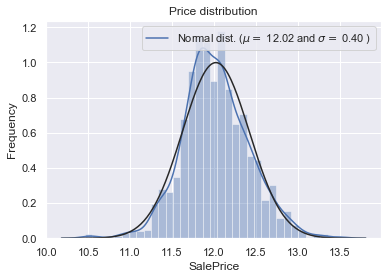

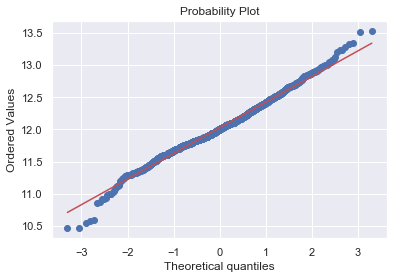

In [95]:
sns.distplot(dados_treino['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dados_treino['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(dados_treino['SalePrice'], plot=plt)
plt.show()

Histograma:

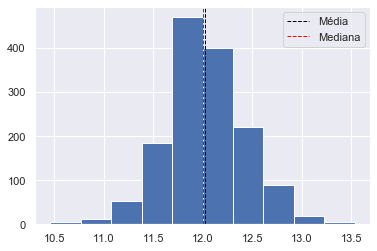

In [96]:
### Lets plot histogram for prices less than 2000
hist_price1 = dados_treino['SalePrice'].hist()
media = dados_treino['SalePrice'].mean()
mediana = dados_treino['SalePrice'].median()
plt.axvline(media, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mediana, color='red', linestyle='dashed', linewidth=1)
plt.legend({'Média':media,'Mediana':mediana})
plt.show()

Box-plot:

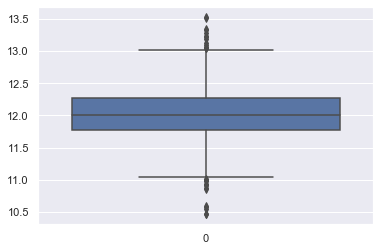

In [97]:
sns.boxplot(data=dados_treino['SalePrice'])
plt.show()

In [98]:
dados_treino['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

Após a transformação do SalePrice pelo log, a distribuição melhorou, apesar de ainda não ser normal. Alguns outliers surgiram também. Uma opção seria dropá-los, mas como podemos nos lembrar, nosso dataset não possui tantas observações (possuimos apenas 1460 observações). Apesar disso, olhando o describre, nossa variância não é tão elevada em relação a média. Por fim, a assimetria reduziu consideravelmente.

In [99]:
dados_treino

,LotFrontage,MasVnrArea,BsmtFinSF1,LotArea,EnclosedPorch,GarageArea,WoodDeckSF,OpenPorchSF,BsmtUnfSF,ScreenPorch,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,4.174387,5.278115,6.559615,9.041922,0.000000,6.306275,0.000000,4.110874,5.010635,0.0,...,0,0,1,0,0,1,0,1,0,12.247694
1,4.382027,0.000000,6.885510,9.169518,0.000000,6.131226,5.697093,0.000000,5.648974,0.0,...,0,0,0,1,0,1,0,1,0,12.109011
2,4.219508,5.087596,6.186209,9.328123,0.000000,6.410175,0.000000,3.737670,6.073045,0.0,...,0,0,1,0,0,1,0,1,0,12.317167
3,4.094345,0.000000,5.375278,9.164296,5.605802,6.464588,0.000000,3.555348,6.291569,0.0,...,0,0,1,0,0,1,1,0,0,11.849398
4,4.430817,5.857933,6.484635,9.565214,0.000000,6.728629,5.257495,4.430817,6.194405,0.0,...,0,0,1,0,0,1,0,1,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.127134,0.000000,0.000000,8.976768,0.000000,6.131226,0.000000,3.688879,6.859615,0.0,...,0,0,0,1,0,1,0,1,0,12.072541
1456,4.442651,4.779123,6.672033,9.486076,0.000000,6.214608,5.855072,0.000000,6.378426,0.0,...,0,0,0,1,0,1,0,1,0,12.254863
1457,4.189655,0.000000,5.616771,9.109636,0.000000,5.529429,0.000000,4.094345,6.776507,0.0,...,0,0,1,0,0,1,0,1,0,12.493130
1458,4.219508,0.000000,3.891820,9.181632,4.718499,5.480639,5.902633,0.000000,0.000000,0.0,...,0,0,1,0,0,1,0,1,0,11.864462


Seleção de variáveis para o modelo. Optei por escolher aquele que teve correlação entre |0.3| < corr < |0.9| com a variável target, que no nosso caso, é o preço em log.

In [100]:
correlacao = dados_treino.corr()
target = 'SalePrice'
corr = correlacao.loc[((correlacao[target] < 0.9) & (correlacao[target] > 0.3)) | ((correlacao[target] > - 0.9) & (correlacao[target] < - 0.13))]
manter = list(corr.index)

In [101]:
len(manter)

95

In [102]:
X = dados_treino[manter]
y = dados_treino[target]

In [103]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [104]:
X

,LotFrontage,MasVnrArea,LotArea,EnclosedPorch,GarageArea,WoodDeckSF,OpenPorchSF,TotRmsAbvGrd,KitchenAbvGr,GrLivArea,...,SaleType_New,SaleType_WD,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_Partial
0,4.174387,5.278115,9.041922,0.000000,6.306275,0.000000,4.110874,8,1,7.444249,...,0,1,0,0,1,0,0,1,0,0
1,4.382027,0.000000,9.169518,0.000000,6.131226,5.697093,0.000000,6,1,7.140453,...,0,1,0,0,0,1,0,1,0,0
2,4.219508,5.087596,9.328123,0.000000,6.410175,0.000000,3.737670,6,1,7.487734,...,0,1,0,0,1,0,0,1,0,0
3,4.094345,0.000000,9.164296,5.605802,6.464588,0.000000,3.555348,7,1,7.448334,...,0,1,0,0,1,0,0,1,1,0
4,4.430817,5.857933,9.565214,0.000000,6.728629,5.257495,4.430817,9,1,7.695303,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.127134,0.000000,8.976768,0.000000,6.131226,0.000000,3.688879,7,1,7.406711,...,0,1,0,0,0,1,0,1,0,0
1456,4.442651,4.779123,9.486076,0.000000,6.214608,5.855072,0.000000,7,1,7.636752,...,0,1,0,0,0,1,0,1,0,0
1457,4.189655,0.000000,9.109636,0.000000,5.529429,0.000000,4.094345,9,1,7.757906,...,0,1,0,0,1,0,0,1,0,0
1458,4.219508,0.000000,9.181632,4.718499,5.480639,5.902633,0.000000,5,1,6.982863,...,0,1,0,0,1,0,0,1,0,0


In [105]:
dados_test

,LotFrontage,MasVnrArea,BsmtFinSF1,LotArea,EnclosedPorch,GarageArea,WoodDeckSF,OpenPorchSF,BsmtUnfSF,ScreenPorch,...,Functional_Typ,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,4.382027,0.000000,6.148468,9.360655,0.0,6.593045,4.941642,0.000000,5.598422,4.787492,...,1,0,0,0,1,0,1,0,1,0
1,4.394449,4.682131,6.827629,9.565704,0.0,5.743003,5.973810,3.583519,6.006353,0.000000,...,1,0,0,1,0,0,1,0,1,0
2,4.304065,0.000000,6.673298,9.534595,0.0,6.177944,5.356586,3.526361,4.919981,0.000000,...,1,0,0,0,1,0,1,0,1,0
3,4.356709,2.995732,6.400257,9.208138,0.0,6.152733,5.886104,3.583519,5.780744,0.000000,...,1,0,0,1,0,0,1,0,1,0
4,3.761200,0.000000,5.572154,8.518193,0.0,6.226537,0.000000,4.406719,6.924612,4.969813,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.044522,0.000000,0.000000,7.568379,0.0,0.000000,0.000000,0.000000,6.302619,0.000000,...,1,0,0,0,1,0,1,0,1,0
1455,3.044522,0.000000,5.529429,7.546446,0.0,5.655992,0.000000,3.178054,5.683580,0.000000,...,1,0,0,0,1,0,1,1,0,0
1456,4.204693,0.000000,7.109879,9.903488,0.0,6.356108,6.161207,0.000000,0.000000,0.000000,...,1,0,0,0,1,0,1,1,0,0
1457,4.127134,0.000000,5.820083,9.253496,0.0,0.000000,4.382027,3.465736,6.354370,0.000000,...,1,0,0,0,1,0,1,0,1,0


In [106]:
# separando os dados em treino e teste (30% para teste)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 42)

In [107]:
# função que calcula o erro percentual absoluto
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [108]:
regrRM2 = RandomForestRegressor()
regrRM2.fit(X_train, y_train)
rfr = regrRM2.fit(X_train, y_train)

ypred=regrRM2.predict(X_test)

mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)
score = r2_score(y_test,ypred)*100
log_error = np.sqrt(mean_squared_log_error(y_test, ypred))

print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}.")
print(f"\nA porcentagem média do erro absoluto foi de: {mape:.4f}% e a raiz quadrada do log do erro foi {log_error:.4f}.")

O R2 do modelo foi de 87.4285, o MSE foi 0.0213 e a raiz quadrada do MSE 0.1460.

A porcentagem média do erro absoluto foi de: 0.8390% e a raiz quadrada do log do erro foi 0.0115.


In [109]:
clf = GradientBoostingRegressor() #check the Gridsearch
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)
score = r2_score(y_test,ypred)*100
log_error = np.sqrt(mean_squared_log_error(y_test, ypred))

print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}.")
print(f"\nA porcentagem média do erro absoluto foi de: {mape:.4f}% e a raiz quadrada do log do erro foi {log_error:.4f}.")

O R2 do modelo foi de 87.9845, o MSE foi 0.0204 e a raiz quadrada do MSE 0.1428.

A porcentagem média do erro absoluto foi de: 0.8049% e a raiz quadrada do log do erro foi 0.0112.


In [110]:
parameters = {'max_depth': [1, 10, 20, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': [100, 200, 300]}

In [111]:
parameters_clf = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [0.1, 0.5, 2],
    "min_samples_leaf": [0.1, 0.5, 2],
    "max_depth":[2, 10, 15]
    }

In [112]:
metricas = ['neg_mean_absolute_error', 'neg_mean_squared_error']

In [113]:
model = RandomForestRegressor()

In [114]:
select_model = GridSearchCV(model, parameters, scoring=metricas, verbose=True, refit='neg_mean_squared_error', return_train_score=False, cv = 5, n_jobs =-1)

In [115]:
select_model.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 10, 20, 45],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=True)

In [116]:
model_best = select_model.best_estimator_

In [117]:
model_best.fit(X_train, y_train)
predictions = model_best.predict(X_test)
        
mse = mean_squared_error(y_test,predictions)
mape = mean_absolute_percentage_error(y_test,predictions)
score = r2_score(y_test,predictions)*100
log_error = np.sqrt(mean_squared_log_error(y_test, predictions))

print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}.")
print(f"\nA porcentagem média do erro absoluto foi de: {mape:.4f}% e a raiz quadrada do log do erro foi {log_error:.4f}.")

O R2 do modelo foi de 87.0803, o MSE foi 0.0219 e a raiz quadrada do MSE 0.1480.

A porcentagem média do erro absoluto foi de: 0.8301% e a raiz quadrada do log do erro foi 0.0116.


In [118]:
model = GradientBoostingRegressor()

In [119]:
select_model = GridSearchCV(model, parameters_clf, scoring=metricas, verbose=True, refit='neg_mean_squared_error', return_train_score=False, cv = 5, n_jobs =-1)

In [120]:
select_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 10, 15],
                         'min_samples_leaf': [0.1, 0.5, 2],
                         'min_samples_split': [0.1, 0.5, 2],
                         'n_estimators': [100, 200, 300]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=True)

In [121]:
model_best = select_model.best_estimator_

In [122]:
model_best.fit(X_train, y_train)
predictions = model_best.predict(X_test)
        
mse = mean_squared_error(y_test,predictions)
mape = mean_absolute_percentage_error(y_test,predictions)
score = r2_score(y_test,predictions)*100
log_error = np.sqrt(mean_squared_log_error(y_test, predictions))

print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}.")
print(f"\nA porcentagem média do erro absoluto foi de: {mape:.4f}% e a raiz quadrada do log do erro foi {log_error:.4f}.")

O R2 do modelo foi de 89.7425, o MSE foi 0.0174 e a raiz quadrada do MSE 0.1319.

A porcentagem média do erro absoluto foi de: 0.7858% e a raiz quadrada do log do erro foi 0.0103.


In [123]:
dados_test

,LotFrontage,MasVnrArea,BsmtFinSF1,LotArea,EnclosedPorch,GarageArea,WoodDeckSF,OpenPorchSF,BsmtUnfSF,ScreenPorch,...,Functional_Typ,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,4.382027,0.000000,6.148468,9.360655,0.0,6.593045,4.941642,0.000000,5.598422,4.787492,...,1,0,0,0,1,0,1,0,1,0
1,4.394449,4.682131,6.827629,9.565704,0.0,5.743003,5.973810,3.583519,6.006353,0.000000,...,1,0,0,1,0,0,1,0,1,0
2,4.304065,0.000000,6.673298,9.534595,0.0,6.177944,5.356586,3.526361,4.919981,0.000000,...,1,0,0,0,1,0,1,0,1,0
3,4.356709,2.995732,6.400257,9.208138,0.0,6.152733,5.886104,3.583519,5.780744,0.000000,...,1,0,0,1,0,0,1,0,1,0
4,3.761200,0.000000,5.572154,8.518193,0.0,6.226537,0.000000,4.406719,6.924612,4.969813,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.044522,0.000000,0.000000,7.568379,0.0,0.000000,0.000000,0.000000,6.302619,0.000000,...,1,0,0,0,1,0,1,0,1,0
1455,3.044522,0.000000,5.529429,7.546446,0.0,5.655992,0.000000,3.178054,5.683580,0.000000,...,1,0,0,0,1,0,1,1,0,0
1456,4.204693,0.000000,7.109879,9.903488,0.0,6.356108,6.161207,0.000000,0.000000,0.000000,...,1,0,0,0,1,0,1,1,0,0
1457,4.127134,0.000000,5.820083,9.253496,0.0,0.000000,4.382027,3.465736,6.354370,0.000000,...,1,0,0,0,1,0,1,0,1,0


In [124]:
X_test = dados_test[manter]

In [125]:
manter

['LotFrontage',
 'MasVnrArea',
 'LotArea',
 'EnclosedPorch',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'TotRmsAbvGrd',
 'KitchenAbvGr',
 'GrLivArea',
 'TotalBsmtSF',
 'TotalAreaSF',
 'GarageYrBlt_Antigo',
 'GarageYrBlt_Novo',
 'YearRemodAdd_Antigo',
 'YearRemodAdd_Novo',
 'YearBuilt_Antigo',
 'YearBuilt_Novo',
 'OverallQual_Baixa',
 'OverallQual_Boa',
 'OverallQual_Excelente',
 'OverallQual_Mediana',
 'Fireplaces_0',
 'Fireplaces_1',
 'GarageCars_0.0',
 'GarageCars_1.0',
 'GarageCars_3.0',
 'HalfBath_0',
 'HalfBath_1',
 'FullBath_1',
 'FullBath_2',
 'BsmtFullBath_0',
 'GarageCond_Fa',
 'GarageType_Detchd',
 'GarageFinish_Fin',
 'GarageFinish_Unf',
 'GarageQual_Fa',
 'BsmtExposure_No',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtCond_Fa',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_SBrkr',
 'Foundation_BrkTil',
 'Foundatio

In [127]:
len(manter)

95

In [126]:
X_test

,LotFrontage,MasVnrArea,LotArea,EnclosedPorch,GarageArea,WoodDeckSF,OpenPorchSF,TotRmsAbvGrd,KitchenAbvGr,GrLivArea,...,SaleType_New,SaleType_WD,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_Partial
0,4.382027,0.000000,9.360655,0.0,6.593045,4.941642,0.000000,5,1,6.797940,...,0,1,0,0,0,1,0,1,0,0
1,4.394449,4.682131,9.565704,0.0,5.743003,5.973810,3.583519,6,1,7.192182,...,0,1,0,0,1,0,0,1,0,0
2,4.304065,0.000000,9.534595,0.0,6.177944,5.356586,3.526361,6,1,7.395722,...,0,1,0,0,0,1,0,1,0,0
3,4.356709,2.995732,9.208138,0.0,6.152733,5.886104,3.583519,7,1,7.380256,...,0,1,0,0,1,0,0,1,0,0
4,3.761200,0.000000,8.518193,0.0,6.226537,0.000000,4.406719,5,1,7.154615,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.044522,0.000000,7.568379,0.0,0.000000,0.000000,0.000000,5,1,6.995766,...,0,1,0,0,0,1,0,1,0,0
1455,3.044522,0.000000,7.546446,0.0,5.655992,0.000000,3.178054,6,1,6.995766,...,0,1,0,0,0,1,0,1,1,0
1456,4.204693,0.000000,9.903488,0.0,6.356108,6.161207,0.000000,7,1,7.109879,...,0,1,0,0,0,1,0,1,1,0
1457,4.127134,0.000000,9.253496,0.0,0.000000,4.382027,3.465736,6,1,6.877296,...,0,1,0,0,0,1,0,1,0,0


In [128]:
ypred = model_best.predict(X_test)

In [129]:
dados_test['SalePrice'] = np.round(np.exp(ypred),2)

In [130]:
dados_test

,LotFrontage,MasVnrArea,BsmtFinSF1,LotArea,EnclosedPorch,GarageArea,WoodDeckSF,OpenPorchSF,BsmtUnfSF,ScreenPorch,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,4.382027,0.000000,6.148468,9.360655,0.0,6.593045,4.941642,0.000000,5.598422,4.787492,...,0,0,0,1,0,1,0,1,0,121450.12
1,4.394449,4.682131,6.827629,9.565704,0.0,5.743003,5.973810,3.583519,6.006353,0.000000,...,0,0,1,0,0,1,0,1,0,154223.33
2,4.304065,0.000000,6.673298,9.534595,0.0,6.177944,5.356586,3.526361,4.919981,0.000000,...,0,0,0,1,0,1,0,1,0,183008.10
3,4.356709,2.995732,6.400257,9.208138,0.0,6.152733,5.886104,3.583519,5.780744,0.000000,...,0,0,1,0,0,1,0,1,0,188307.27
4,3.761200,0.000000,5.572154,8.518193,0.0,6.226537,0.000000,4.406719,6.924612,4.969813,...,0,0,1,0,0,1,0,1,0,169895.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.044522,0.000000,0.000000,7.568379,0.0,0.000000,0.000000,0.000000,6.302619,0.000000,...,0,0,0,1,0,1,0,1,0,82406.33
1455,3.044522,0.000000,5.529429,7.546446,0.0,5.655992,0.000000,3.178054,5.683580,0.000000,...,0,0,0,1,0,1,1,0,0,86454.73
1456,4.204693,0.000000,7.109879,9.903488,0.0,6.356108,6.161207,0.000000,0.000000,0.000000,...,0,0,0,1,0,1,1,0,0,139387.31
1457,4.127134,0.000000,5.820083,9.253496,0.0,0.000000,4.382027,3.465736,6.354370,0.000000,...,0,0,0,1,0,1,0,1,0,135360.18


In [131]:
dados_test_ = pd.read_csv('C:/Users/Manoel/Documents/GitHub/Venda_Casas/input/test.csv')

In [132]:
dados_test['Id'] = dados_test_['Id']

In [133]:
submit = dados_test[['Id', 'SalePrice']]

In [134]:
submit

,Id,SalePrice
0,1461,121450.12
1,1462,154223.33
2,1463,183008.10
3,1464,188307.27
4,1465,169895.57
...,...,...
1454,2915,82406.33
1455,2916,86454.73
1456,2917,139387.31
1457,2918,135360.18


In [135]:
submit.to_csv('C:/Users/Manoel/Documents/GitHub/Venda_Casas/output/output_1.csv', index = False)